# Chapter 12: Animations with Matplotlib
+ Animation basics
+ Celluloid library

## Animation Basics

In [1]:
%matplotlib qt
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
fig = plt.figure()
ax = plt.axes(xlim=(0,4), ylim=(-2,2))
line, = ax.plot([], [], lw=3)

Let’s define the function `init()`, which 
+ will initialize the animation and 
+ set the data for the animation

In [3]:
def init():
    line.set_data([], [])
    return line, 

In [4]:
def animate(i):
    """
    Function accepts the frame number as an argument (i) 
    and renders the frame for animation.
    """
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

Let’s create an animation object using the function call `FuncAnimation()`
+ accepts the created functions as arguments
+ also accepts the number of frames and the interval as arguments
+ The argument for the parameter blit is True. This means that only the parts of the plot that have changed are redrawn

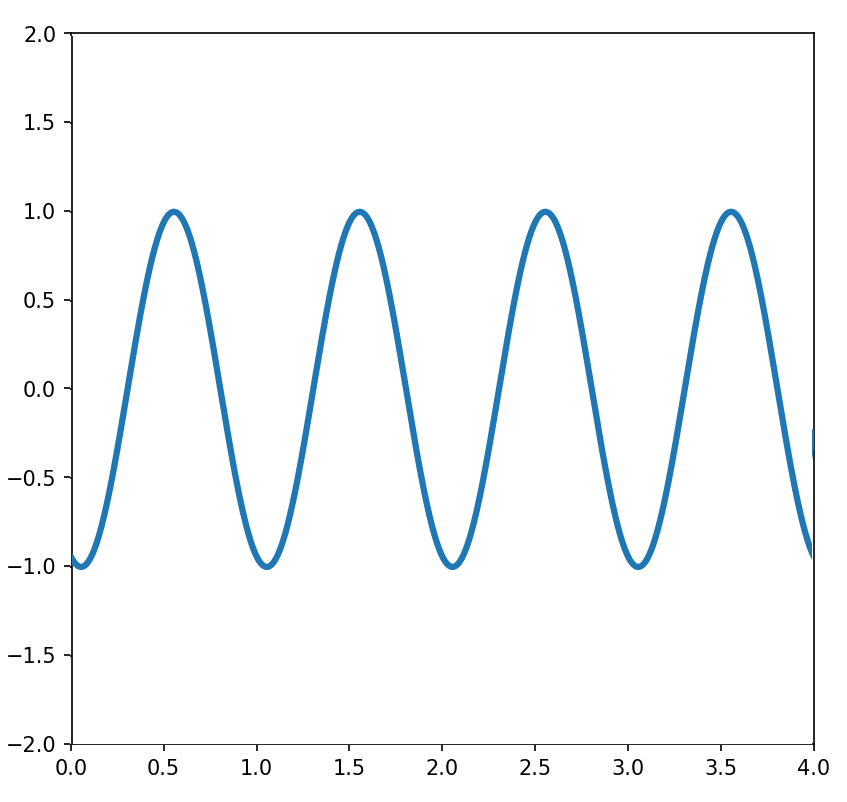

In [5]:
anim = FuncAnimation(fig, animate, init_func=init,
                    frames=1000, interval=10, blit=True)

You can also save the animation as a GIF as follo

You can interact with animation and change the orientation with your mouse

**You can create a progressive spiral**
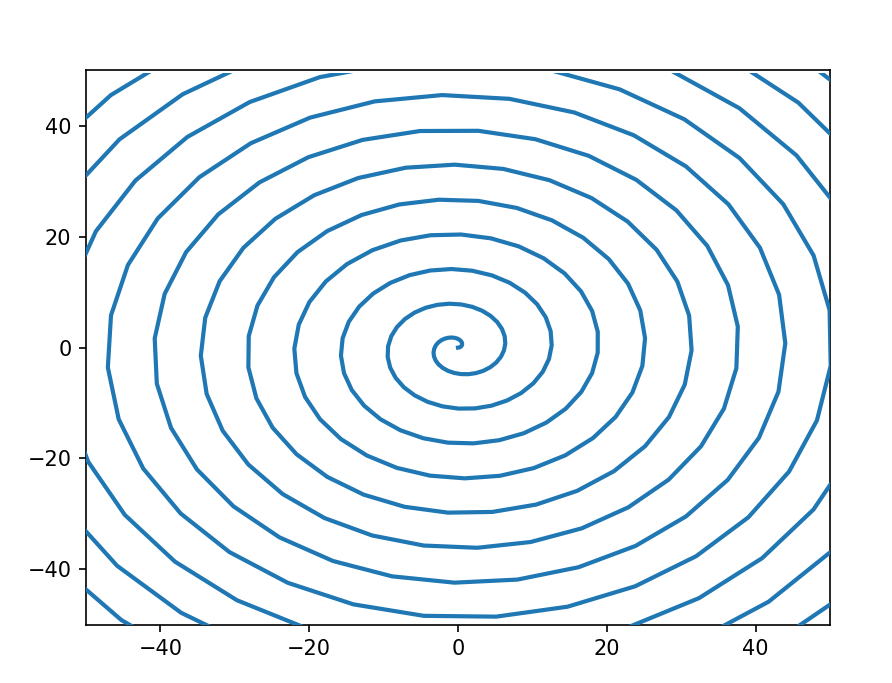

In [7]:
fig = plt.figure()
ax = plt.axes(xlim=(-50,50), ylim=(-50,50))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

xdata, ydata = [], []
def animate(i):
    t = 0.2 * i
    x = t * np.cos(t)
    y = t * np.sin(t)
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                    frames=3000, interval=5, blit=True)

Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py", line 304, in process
    func(*args, **kwargs)
  File "C:\Users\User\anaconda3\Lib\site-packages\matplotlib\animation.py", line 914, in _stop
    self._fig.canvas.mpl_disconnect(self._resize_id)
                                    ^^^^^^^^^^^^^^^
AttributeError: 'FuncAnimation' object has no attribute '_resize_id'


## Celluloid Library
+ You can use another simple library called Celluloid for animation.

In [12]:
from celluloid import Camera

# Let’s create a figure and camera object
fig = plt.figure()
camera = Camera(fig)


# Let’s create the frames of an animation and
# save them in memory with the function camera.snap(),
for i in range(10):
    plt.plot([i] * 10)
    camera.snap()
    


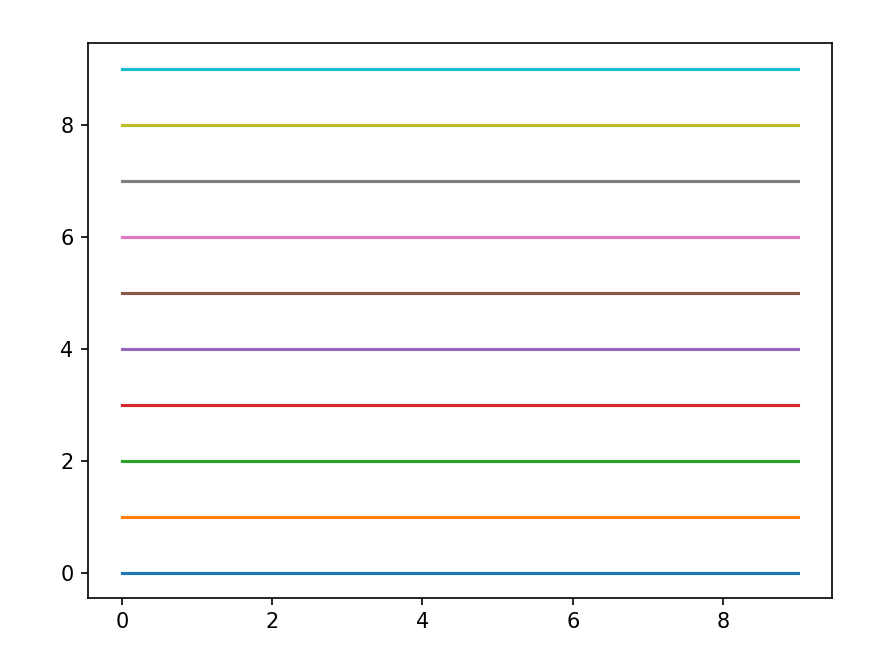

In [14]:
# Let’s create a figure and camera object
fig = plt.figure()
camera = Camera(fig)


# Let’s create the frames of an animation and
# save them in memory with the function camera.snap(),
for i in range(10):
    plt.plot([i] * 10)
    camera.snap()

# Let’s create the animation as follows
animation = camera.animate()

C:\Users\User\anaconda3\Lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


You can also create a sine wave as follows
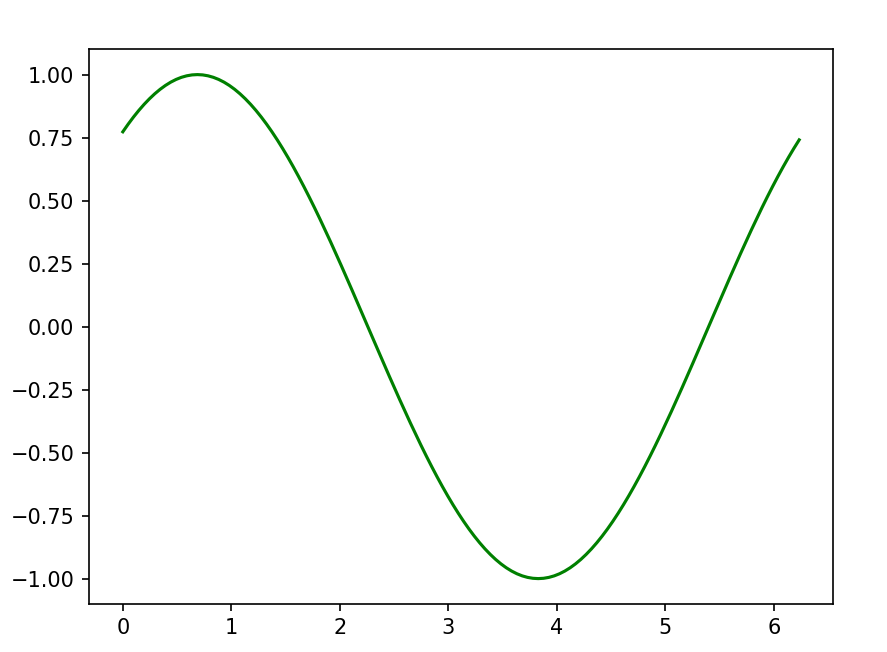

In [17]:
fig, axes = plt.subplots()
camera = Camera(fig)

t = np.linspace(0, 2 * np.pi, 128, endpoint=False)

for i in t:
    plt.plot(t, np.sin(t + i), color='green')
    camera.snap()
    
animation = camera.animate()

Another example with a bar graph is as follows
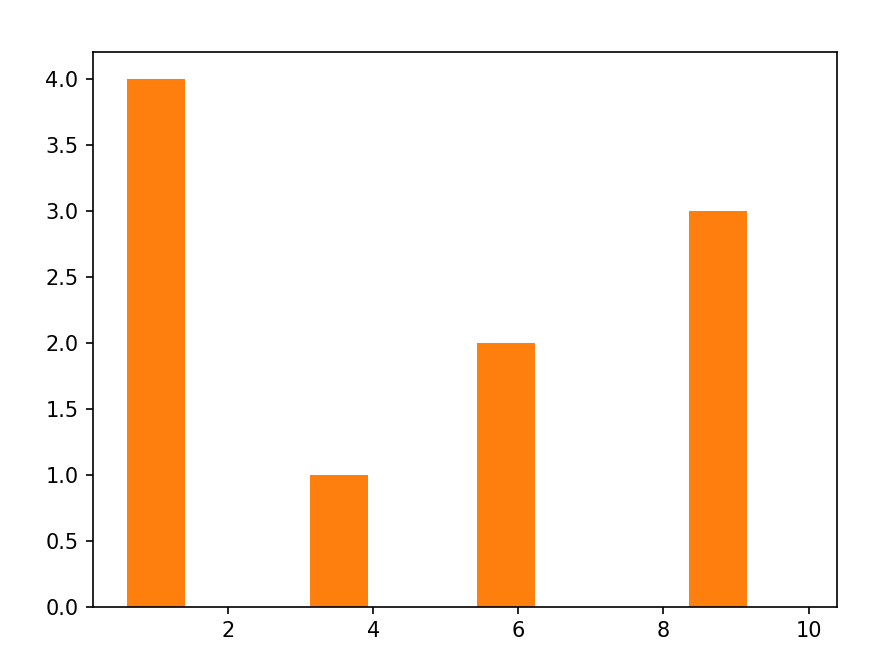

In [20]:
fig, axes = plt.subplots()
camera = Camera(fig)

y = np.arange(5)
for i in y:
    plt.bar(np.random.rand(5) * 10, y)
    camera.snap()
    
animation = camera.animate()